Saving 75% consolittion- filtered.xlsx to 75% consolittion- filtered.xlsx
Total Students: 13905
Average Attendance: 34.19%
Students Below 75%: 13291


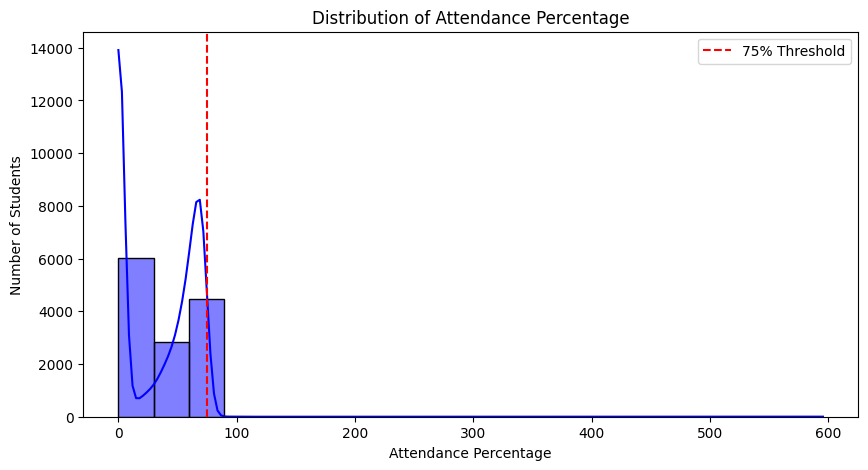

<ipython-input-1-a902675f4fd0>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=school_low_attendance.values, y=school_low_attendance.index, palette="Blues_r")


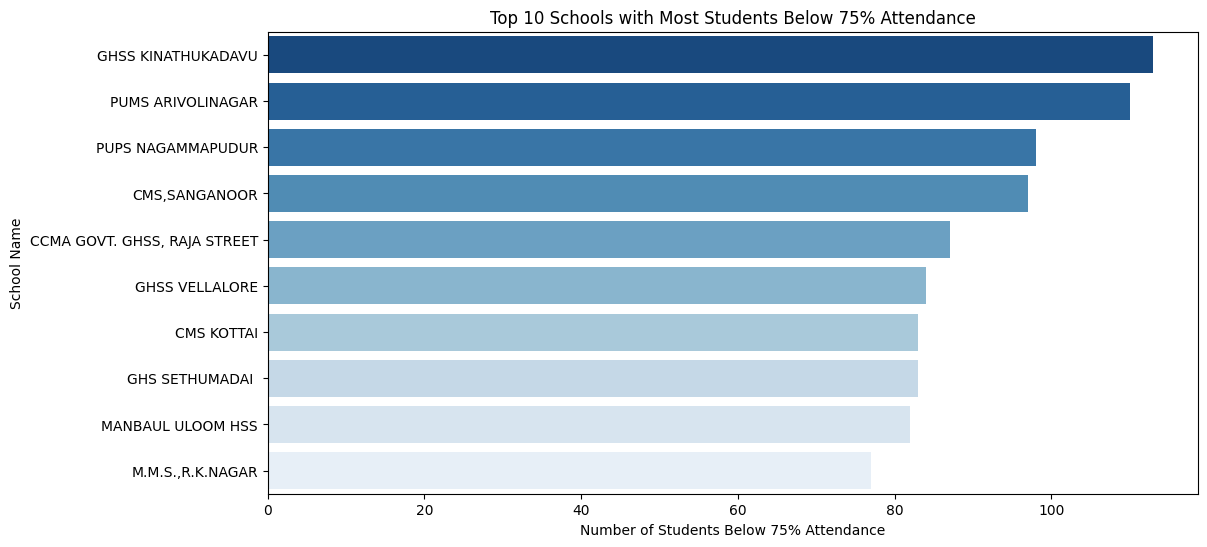

<ipython-input-1-a902675f4fd0>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_reasons.values, y=common_reasons.index, palette="Reds_r")


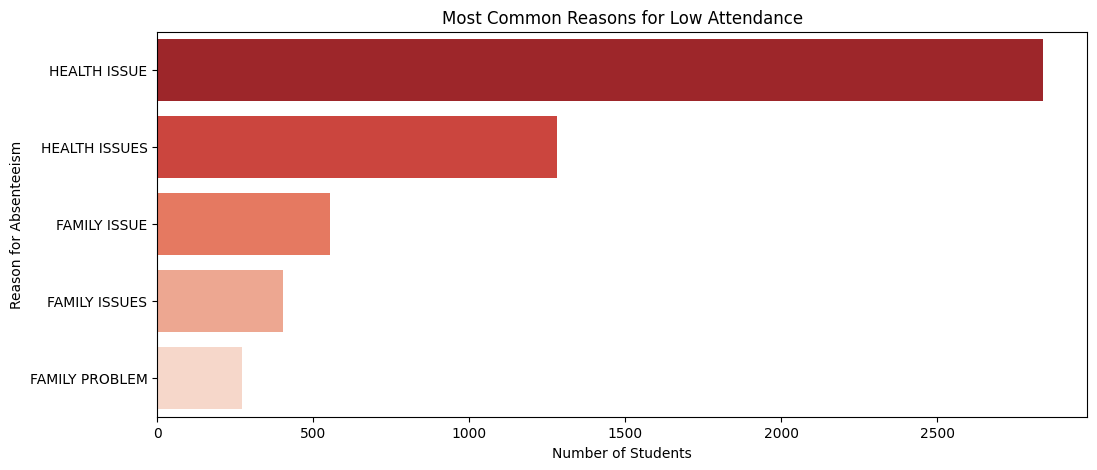

In [1]:

# Import necessary libraries
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload file manually
uploaded = files.upload()

# Load the Excel file
file_path = list(uploaded.keys())[0]  # Get uploaded file name
xls = pd.ExcelFile(file_path)

# Display sheet names to check available data
xls.sheet_names
# Load specific sheets (adjust sheet names based on your file)
df_students = pd.read_excel(xls, sheet_name="<75% students attendance")

df_schools = pd.read_excel(xls, sheet_name="Below75% attendance")
# Drop empty rows
df_students = df_students.dropna(how="all")

# Rename columns for clarity
df_students.columns = [
    "Block Name", "School Name", "Student Name", "Standard & Section",
    "Total Working Days", "Days Present", "Attendance Percentage", "Reason"
]

# Convert Attendance Percentage to numeric
df_students["Attendance Percentage"] = pd.to_numeric(df_students["Attendance Percentage"], errors='coerce')

# Basic statistics
total_students = df_students.shape[0]
avg_attendance = df_students["Attendance Percentage"].mean()
below_75_count = (df_students["Attendance Percentage"] < 75).sum()

print(f"Total Students: {total_students}")
print(f"Average Attendance: {avg_attendance:.2f}%")
print(f"Students Below 75%: {below_75_count}")

plt.figure(figsize=(10, 5))
sns.histplot(df_students["Attendance Percentage"], bins=20, kde=True, color="blue")
plt.axvline(x=75, color='red', linestyle='--', label="75% Threshold")
plt.xlabel("Attendance Percentage")
plt.ylabel("Number of Students")
plt.title("Distribution of Attendance Percentage")
plt.legend()
plt.show()

# Count students below 75% attendance per school
school_low_attendance = df_students[df_students["Attendance Percentage"] < 75]["School Name"].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=school_low_attendance.values, y=school_low_attendance.index, palette="Blues_r")
plt.xlabel("Number of Students Below 75% Attendance")
plt.ylabel("School Name")
plt.title("Top 10 Schools with Most Students Below 75% Attendance")
plt.show()

# Plot most common reasons for absenteeism
common_reasons = df_students["Reason"].value_counts().head(5)

plt.figure(figsize=(12, 5))
sns.barplot(x=common_reasons.values, y=common_reasons.index, palette="Reds_r")
plt.xlabel("Number of Students")
plt.ylabel("Reason for Absenteeism")
plt.title("Most Common Reasons for Low Attendance")
plt.show()